In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # FOR K=13 ,IT HAS ACCURACY AROUND 72.7488902980
from sklearn import metrics

In [43]:
df=pd.read_csv(r"C:\Users\prane\Desktop\2021_2022_2\ML\Assignment 1\CSV_datasetsix_vowel_dataset_with_class.csv")
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,class
0,255,255,254,255,255,255,252,255,255,255,...,255,255,255,255,255,255,255,255,255,1
1,255,255,254,255,255,254,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
2,255,254,255,255,255,255,254,255,254,255,...,255,255,255,255,255,255,255,255,255,1
3,254,255,255,255,254,255,255,255,254,255,...,255,255,255,255,255,255,255,255,255,1
4,254,255,255,253,255,255,255,254,255,255,...,255,255,255,255,255,255,255,255,255,1


In [44]:
pixels=[]
for i in range(784):
    pixels.append('pixel'+str(i))

features=pixels
X=df.loc[:,features].values
y=df.loc[:,'class'].values

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [45]:
X_train.shape

(960, 784)

In [46]:
X_train=X_train/255
X_test=X_test/255
X_train=np.where(X_train>0.7,1,0)
X_test=np.where(X_test>0.7,1,0)


In [48]:
print(X_train)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [57]:
X_train_2D=X_train.reshape(X_train.shape[0],28,28)
X_test_2D=X_test.reshape(X_test.shape[0],28,28)
X_train_Zone=[]
X_test_Zone=[]
for i in range(X_train_2D.shape[0]):
    image=X_train_2D[i]
    y,x=image.shape
    y=(int)(y/4)
    x=(int)(x/4)
    new_image=np.zeros((y,x))
    for j in range(y):
        for k in range(x):
            new_image[j][k]=np.sum(image[4*j:4*j+4,4*k:4*k+4])
    new_image_flatten=new_image.flatten()
    X_train_Zone.append(new_image_flatten)

for i in range(X_test_2D.shape[0]):
    image=X_test_2D[i]
    y,x=image.shape
    y=(int)(y/4)
    x=(int)(x/4)
    new_image=np.zeros((y,x))
    for j in range(y):
        for k in range(x):
            new_image[j][k]=np.sum(image[4*j:4*j+4,4*k:4*k+4])
    new_image_flatten=new_image.flatten()
    X_test_Zone.append(new_image_flatten)



In [74]:
print(X_train_2D[940])
print(X_train_Zone[940])

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 

In [60]:
len(X_train_Zone)

960

In [61]:
k_values=range(1,50)
accuracy=[]
error=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_Zone,y_train)
    y_pred=knn.predict(X_test_Zone)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    error.append(np.mean(y_pred!=y_test))

accuracy=[i*100 for i in accuracy]
print(accuracy)

[92.5, 88.75, 89.58333333333334, 91.25, 87.91666666666667, 89.16666666666667, 87.91666666666667, 89.16666666666667, 85.83333333333333, 87.5, 86.66666666666667, 87.5, 86.25, 85.83333333333333, 85.0, 85.83333333333333, 85.41666666666666, 87.5, 85.0, 86.66666666666667, 85.83333333333333, 86.66666666666667, 85.83333333333333, 85.83333333333333, 86.66666666666667, 85.83333333333333, 86.25, 85.83333333333333, 85.41666666666666, 83.33333333333334, 83.33333333333334, 84.16666666666667, 83.75, 83.75, 83.33333333333334, 82.91666666666667, 82.91666666666667, 82.91666666666667, 82.5, 83.33333333333334, 82.5, 81.66666666666667, 82.91666666666667, 82.91666666666667, 82.91666666666667, 82.5, 82.08333333333333, 81.66666666666667, 82.5]


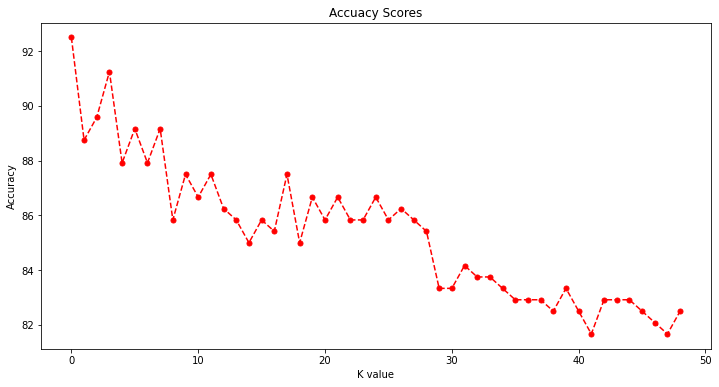

In [62]:
plt.figure(figsize=(12,6))
plt.plot(accuracy,color='red',linestyle="--",marker="o",markersize=5)
plt.title("Accuacy Scores")
plt.xlabel('K value')
plt.xticks=[i for i in range(1,26)]
plt.ylabel('Accuracy')
plt.show()

In [63]:
error=[i*100 for i in error]
error

[7.5,
 11.25,
 10.416666666666668,
 8.75,
 12.083333333333334,
 10.833333333333334,
 12.083333333333334,
 10.833333333333334,
 14.166666666666666,
 12.5,
 13.333333333333334,
 12.5,
 13.750000000000002,
 14.166666666666666,
 15.0,
 14.166666666666666,
 14.583333333333334,
 12.5,
 15.0,
 13.333333333333334,
 14.166666666666666,
 13.333333333333334,
 14.166666666666666,
 14.166666666666666,
 13.333333333333334,
 14.166666666666666,
 13.750000000000002,
 14.166666666666666,
 14.583333333333334,
 16.666666666666664,
 16.666666666666664,
 15.833333333333332,
 16.25,
 16.25,
 16.666666666666664,
 17.083333333333332,
 17.083333333333332,
 17.083333333333332,
 17.5,
 16.666666666666664,
 17.5,
 18.333333333333332,
 17.083333333333332,
 17.083333333333332,
 17.083333333333332,
 17.5,
 17.916666666666668,
 18.333333333333332,
 17.5]

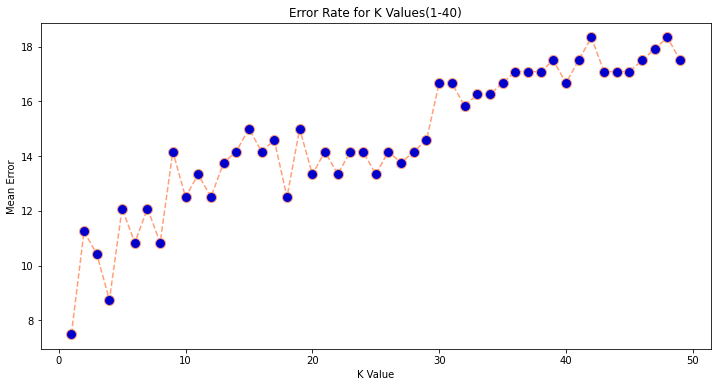

In [64]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='lightsalmon', linestyle='dashed', marker='o',  
         markerfacecolor='mediumblue', markersize=10);
plt.title('Error Rate for K Values(1-40)')  
plt.xlabel('K Value') ;
plt.ylabel('Mean Error') ;

In [65]:
max_acc=max(accuracy)
max_acc_k=accuracy.index(max_acc)+1
print(max_acc_k)
print(max_acc)

1
92.5
